<a href="https://colab.research.google.com/github/trippleooo/Advanced-Calculator/blob/main/Untitled61.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ydata-profiling pandas numpy scikit-learn matplotlib seaborn

#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d72aa46d72cfab1e846f4b2591e2030f1b472e360a7f9e093f97ff374a9fe4be
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [2]:
df = pd.read_csv("/content/adm_data.csv")

Data preprocessing

In [4]:
df.head(20)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0            1        337          118                  4  4.5   4.5  9.65   
1            2        324          107                  4  4.0   4.5  8.87   
2            3        316          104                  3  3.0   3.5  8.00   
3            4        322          110                  3  3.5   2.5  8.67   
4            5        314          103                  2  2.0   3.0  8.21   
5            6        330          115                  5  4.5   3.0  9.34   
6            7        321          109                  3  3.0   4.0  8.20   
7            8        308          101                  2  3.0   4.0  7.90   
8            9        302          102                  1  2.0   1.5  8.00   
9           10        323          108                  3  3.5   3.0  8.60   
10          11        325          106                  3  3.5   4.0  8.40   
11          12        327          111                  4  4.0   4.5  9.00   
12          13        328          112                  4  4.0   4.5  9.10   
13          14        307          109                  3  4.0   3.0  8.00   
14          15        311          104                  3  3.5   2.0  8.20   
15          16        314          105                  3  3.5   2.5  8.30   
16          17        317          107                  3  4.0   3.0  8.70   
17          18        319          106                  3  4.0   3.0  8.00   
18          19        318          110                  3  4.0   3.0  8.80   
19          20        303          102                  3  3.5   3.0  8.50   

    Research  Chance of Admit   
0          1              0.92  
1          1              0.76  
2          1              0.72  
3          1              0.80  
4          0              0.65  
5          1              0.90  
6          1              0.75  
7          0              0.68  
8          0              0.50  
9          0              0.45  
10         1              0.52  
11         1              0.84  
12         1              0.78  
13         1              0.62  
14         1              0.61  
15         0              0.54  
16         0              0.66  
17         1              0.65  
18         0              0.63  
19         0              0.62

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [ ]:
# There are no missing values in my dataset

In [6]:
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

In [7]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
#there are no duplicates in my dataset

In [9]:
profile = ProfileReport(df, title="YData Profiling Report", explorative=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 68.12it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# the dataset is clean and most of the columns have high correlation towards getting admitted so all will be used apart from the serial number all the needs to be done is scale them.

FEATURE ENGINEERING

In [10]:
df.drop("Serial No.", axis=1, inplace=True)

In [13]:
#selecting features and target
X = df.drop("Chance of Admit ", axis=1)
y = df["Chance of Admit "]
#scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# train the model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [14]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")


Mean Squared Error: 0.005
R² Score: 0.821


Why I Chose This Dataset
I chose this dataset because it closely aligns with the goals of my final project, which focuses on analyzing and predicting university admission outcomes based on students’ academic and personal profiles. This dataset provides realistic, structured data that includes academic scores (like GRE, TOEFL, CGPA), recommendation strength, and research experience — all of which are commonly used in real-world admission decisions.

Since my long-term goal involves working on admission data from Kenyan high school to university transitions, this dataset serves as an ideal starting point for learning and experimentation before moving to localized data.

Why I Chose Regression
I chose regression because the task is to predict a continuous numerical value — the probability (Chance of Admit) that a student will be accepted to a university. Regression allows me to:

Model the relationship between academic variables and admission outcomes,

Interpret how changes in features (like GRE or CGPA) influence the chance of being admitted,

Provide probabilistic predictions, which are more informative than a simple Yes/No classification

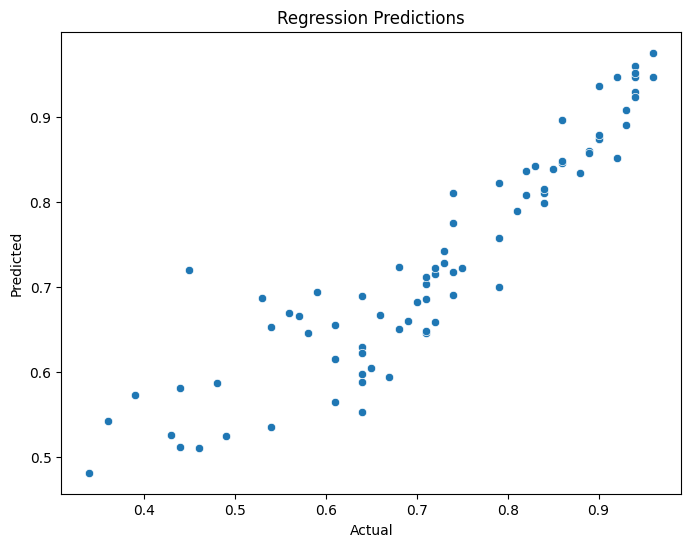

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Regression Predictions")
plt.show()